In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from  pywaffle import Waffle 

In [5]:
df = pd.read_csv(r"D:\downloads\train.csv")  
df.head() 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [8]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df['Age'].fillna(df['Age'].median(), inplace=True )

C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_3592\440913170.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True )


In [11]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df.isnull().sum()

C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_3592\1405547764.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
df.drop(columns=['Cabin'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


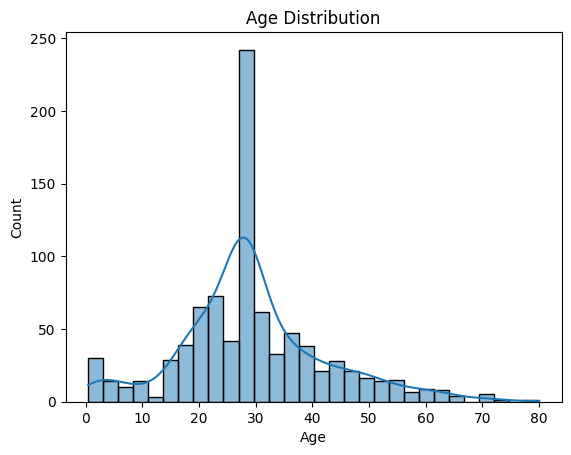

In [13]:
sns.histplot(df['Age'],kde=True)
plt.title('Age Distribution')
plt.show()

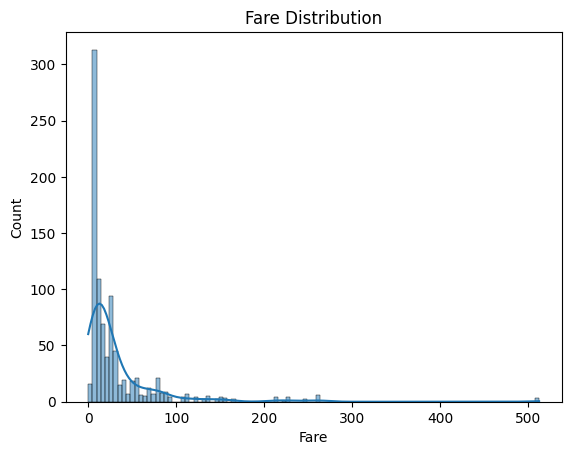

In [ ]:
sns.histplot(df['Fare'],kde=True)
plt.title('Fare Distribution')
plt.show()

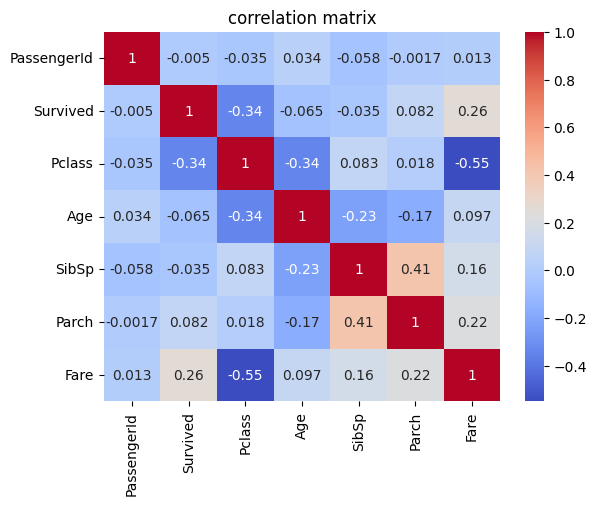

In [ ]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.Figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

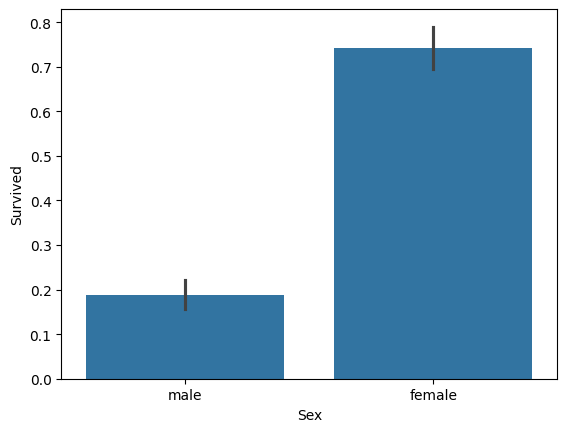

In [ ]:
sns.barplot(x="Sex", y="Survived", data=df)
plt.show()

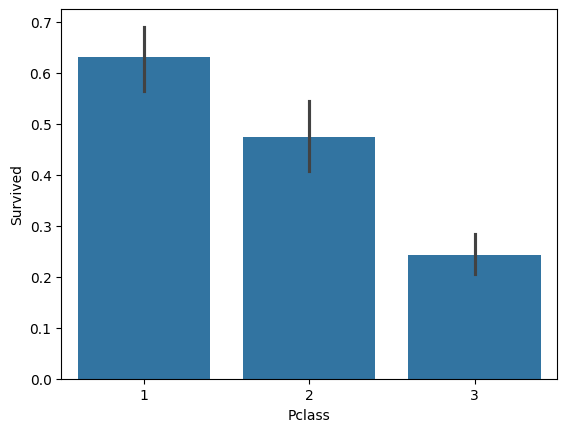

In [ ]:
sns.barplot(x="Pclass", y="Survived", data=df)
plt.show()

Survived
0    549
1    342
Name: count, dtype: int64


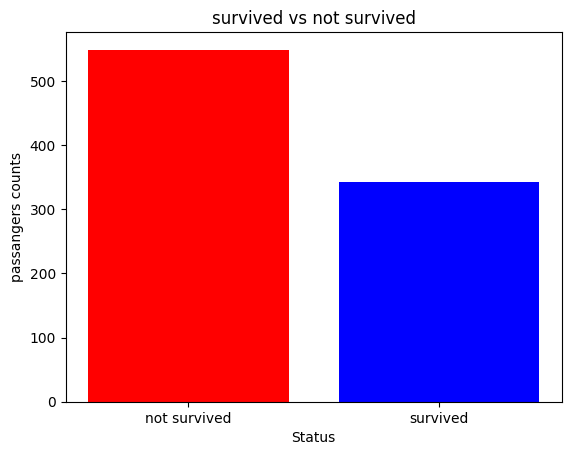

In [ ]:
Survival_counts=df['Survived'].value_counts()
print(Survival_counts)
plt.bar(['not survived','survived'],Survival_counts, color=['red','blue'])
plt.xlabel('Status')
plt.ylabel('passangers counts')
plt.title('survived vs not survived')
plt.show()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


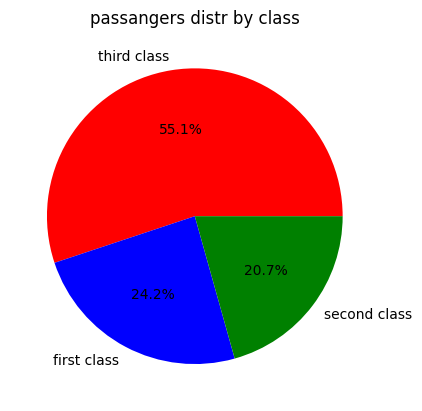

In [ ]:
pclass_counts=df['Pclass'].value_counts()
print(pclass_counts)
plt.pie(pclass_counts,labels=['third class','first class','second class'],autopct='%1.1f%%' ,colors=['red','blue','green'])
plt.title('passangers distr by class')
plt.show()

Sex
male      577
female    314
Name: count, dtype: int64


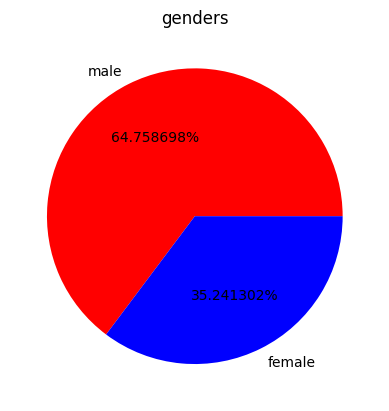

In [ ]:
gender_counts=df['Sex'].value_counts()
print(gender_counts)
plt.pie(gender_counts,labels=['male','female'],autopct='%1f%%' ,colors=['red','blue'])
plt.title('genders')
plt.show()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


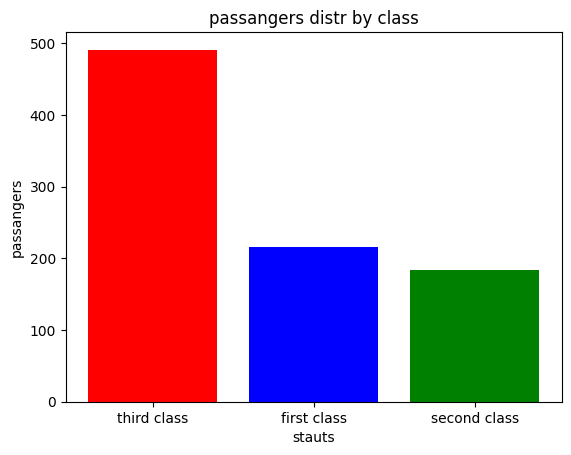

In [ ]:
pclass_counts=df['Pclass'].value_counts()
print(pclass_counts)
plt.bar(['third class','first class','second class'],pclass_counts,color=['red','blue','green'])
plt.xlabel('stauts')
plt.ylabel('passangers')
plt.title('passangers distr by class')
plt.show()

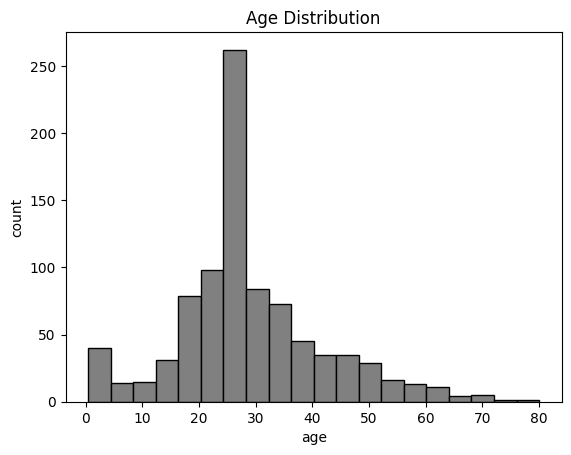

In [ ]:
plt.hist(df['Age'], bins=20, color='grey', edgecolor='black')
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age Distribution')
plt.show()

C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_11572\247535154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Pclass"], y=df["Fare"], palette="coolwarm")


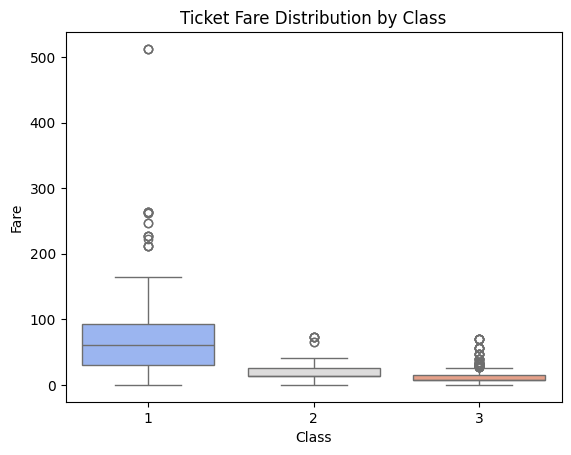

In [ ]:
#Analysis Ticket Fare Using Box Plot
sns.boxplot(x=df["Pclass"], y=df["Fare"], palette="coolwarm")
plt.xlabel("Class")
plt.ylabel("Fare")
plt.title("Ticket Fare Distribution by Class")
plt.show()

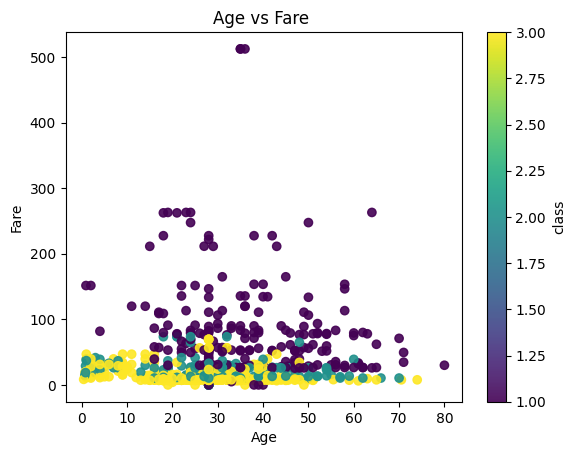

In [ ]:
plt.scatter(df['Age'],df['Fare'],alpha=0.9,c=df['Pclass'],cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare ')
plt.colorbar(label='class')
plt.show()

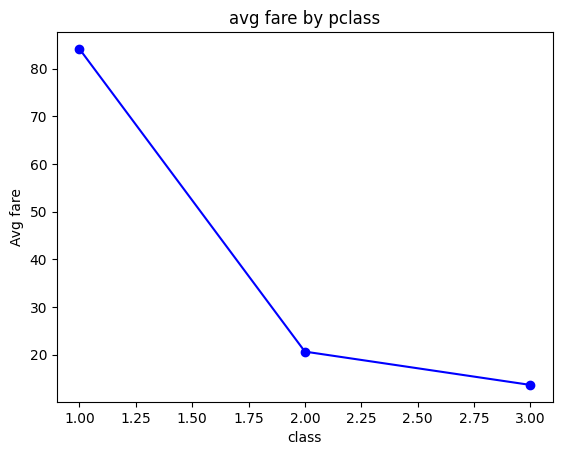

In [ ]:
avg_per_class=df.groupby('Pclass')['Fare'].mean()
plt.plot(avg_per_class.index,avg_per_class.values,marker='o',linestyle='-',color='blue')
plt.xlabel('class')
plt.ylabel('Avg fare')
plt.title('avg fare by pclass')
plt.show()